<a href="https://colab.research.google.com/github/sudipta-data/Amazon-Electronic-Products-Sales-/blob/main/Electronic_Products_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Visualization
import seaborn as sns

# Importing Dataset
dataset = pd.read_csv("/content/electronics.csv")


# List of first 5 rows
dataset.head()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0.0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999.0,NaN,0.0
1,0,1.0,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999.0,NaN,0.0
2,0,2.0,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999.0,NaN,0.0
3,0,3.0,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999.0,NaN,0.0
4,0,4.0,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999.0,NaN,0.0


In [2]:
# List of last 5 rows
dataset.tail()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
474220,3453,436169.0,1.0,2015-03-31,Female&Male,Computers & Accessories,NaN,2013.0,NaN,0.0
474221,3204,436170.0,4.0,2015-03-31,Male,Portable Audio & Video,NaN,2013.0,Male,0.0
474222,4727,436171.0,5.0,2015-03-31,Female,Computers & Accessories,Plemo,2014.0,NaN,0.0
474223,1807,436172.0,5.0,2015-03-31,Male,Headphones,NaN,2011.0,NaN,0.0
474224,5049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Shape of Dataset
dataset.shape

(474225, 10)

In [5]:
# Dataset info
# It helps to understand the structure of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474225 entries, 0 to 474224
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   item_id     474225 non-null  int64  
 1   user_id     474224 non-null  float64
 2   rating      474224 non-null  float64
 3   timestamp   474224 non-null  object 
 4   model_attr  474224 non-null  object 
 5   category    474224 non-null  object 
 6   brand       146063 non-null  object 
 7   year        474224 non-null  float64
 8   user_attr   60623 non-null   object 
 9   split       474224 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 36.2+ MB


In [6]:
# Convert TimeStamp
from datetime import datetime
pd.to_datetime(dataset['timestamp'])

,timestamp
0,1999-06-13
1,1999-06-14
2,1999-06-17
3,1999-07-01
4,1999-07-06
...,...
474220,2015-03-31
474221,2015-03-31
474222,2015-03-31
474223,2015-03-31


In [7]:
# Convert Product ID into String
dataset['brand'] = dataset['brand'].astype(str)

In [10]:
# Convert category to a string
dataset['category'] = dataset['category'].astype(str)

In [9]:
# Convert rating to a float
dataset['rating'] = dataset['rating'].astype(float)

In [11]:
# Convert user_id to a string
dataset['user_id'] = dataset['user_id'].astype(str)

In [12]:
# Convert item_id to a string
dataset['item_id'] = dataset['item_id'].astype(str)

In [13]:
# Statistical Summary of dataset
dataset.describe()

,rating,year,split
count,474224.000000,474224.000000,474224.000000
mean,4.075654,2011.297332,0.115133
std,1.330610,2.712653,0.448448
min,1.000000,1999.000000,0.000000
25%,4.000000,2010.000000,0.000000
50%,5.000000,2012.000000,0.000000
75%,5.000000,2013.000000,0.000000
max,5.000000,2018.000000,2.000000


In [16]:
# Number of Unique Users and items in the dataset
dataset.nunique()

,0
item_id,6600
user_id,436174
rating,5
timestamp,5077
model_attr,3
category,11
brand,51
year,20
user_attr,2
split,3


In [20]:
# Check the duplicates
dataset.duplicated().sum()

np.int64(0)

In [22]:
# Check for missing values
dataset.isnull().sum()

,0
item_id,0
user_id,0
rating,1
timestamp,1
model_attr,1
category,0
brand,0
year,1
user_attr,413602
split,1


Finding Answer from the data we have


<Axes: xlabel='rating', ylabel='count'>

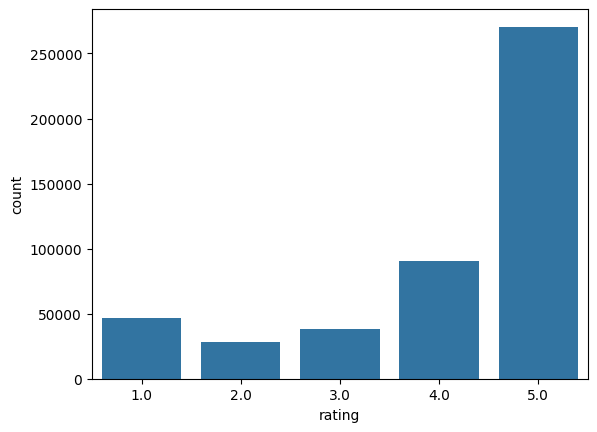

In [23]:
# Distribution of Rating
sns.countplot(x='rating', data=dataset)

<Axes: xlabel='year'>

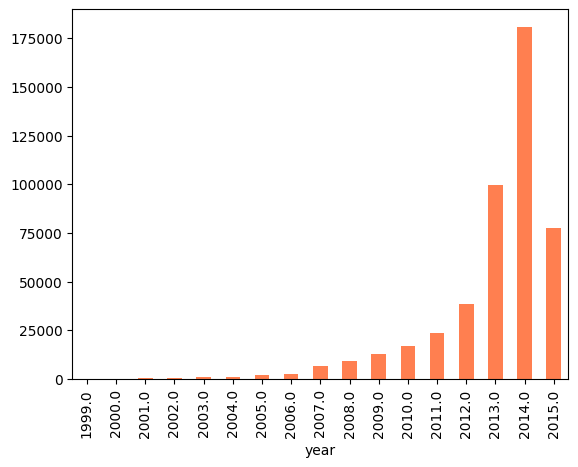

In [46]:
# What was the best year of sales
dataset['year'] = pd.DatetimeIndex(dataset['timestamp']).year

dataset.groupby('year')['rating'].count().plot(kind='bar',color='Coral')

<Axes: xlabel='brand'>

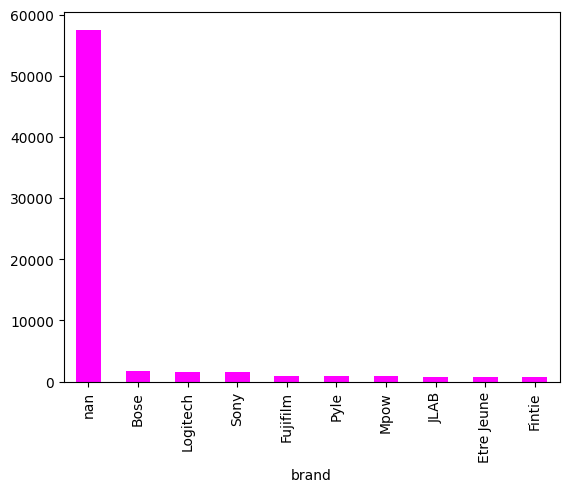

In [51]:
# We see that 2014 had the best sales So What Product sold out Most in 2014
dataset_2015 = dataset[dataset['year'] == 2015]

dataset_2015.groupby('brand')['rating'].count().sort_values(ascending=False).head(10).plot(kind='bar',color='Magenta')

<Axes: xlabel='brand'>

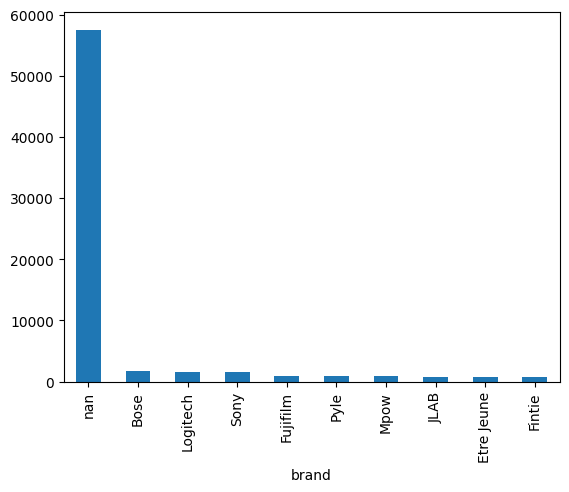

In [25]:
# What brand sold most in 2015
dataset_2015 = dataset[dataset['year'] == 2015]

dataset_2015.groupby('brand')['rating'].count().sort_values(ascending=False).head(10).plot(kind='bar')

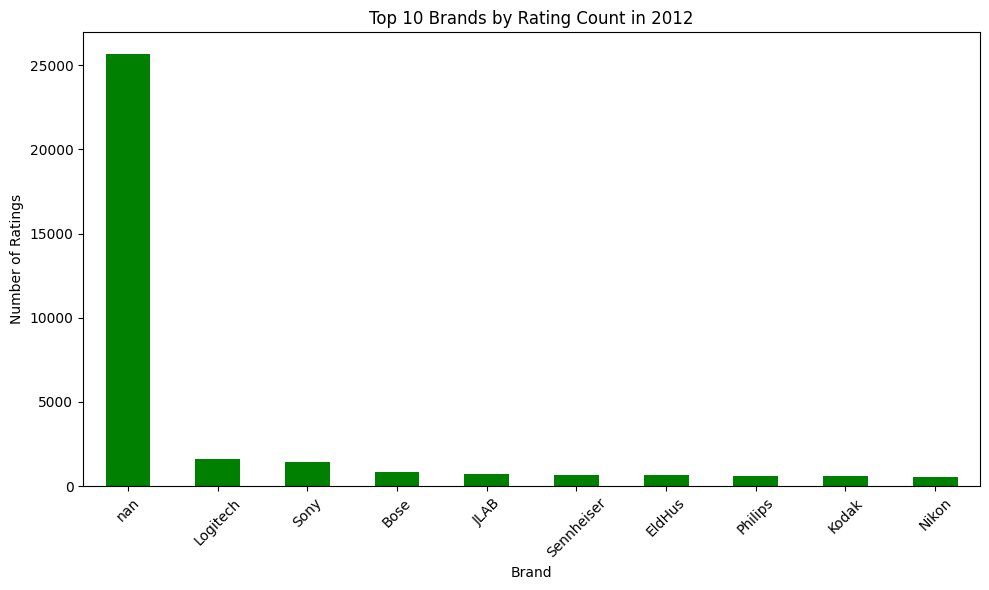

In [38]:
# What product sold most in 2012
filtered = dataset[dataset['year'] == 2012]

# Proceed only if there's data
if not filtered.empty:
    filtered.groupby('brand')['rating'] \
        .count() \
        .sort_values(ascending=False) \
        .head(10) \
        .plot(kind='bar', title='Top 10 Brands by Rating Count in 2012', figsize=(10, 6), color='green')

    plt.xlabel('Brand')
    plt.ylabel('Number of Ratings')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No data available for year 2012.")

<Axes: xlabel='year'>

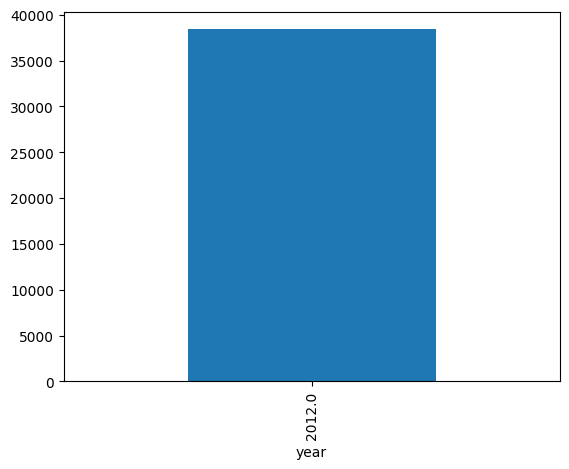

In [33]:
# How much products sold out in year 2012
dataset[dataset['year'] == 2012].groupby('year')['rating'].count().plot(kind='bar')

<Axes: xlabel='brand'>

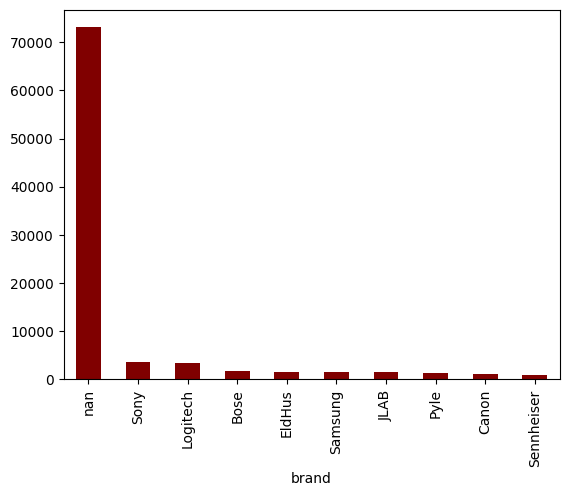

In [43]:
# What product sold the most in 2013
dataset[dataset['year'] == 2013].groupby('brand')['rating'].count().sort_values(ascending=False).head(10).plot(kind='bar',color='Maroon')

<Axes: xlabel='brand'>

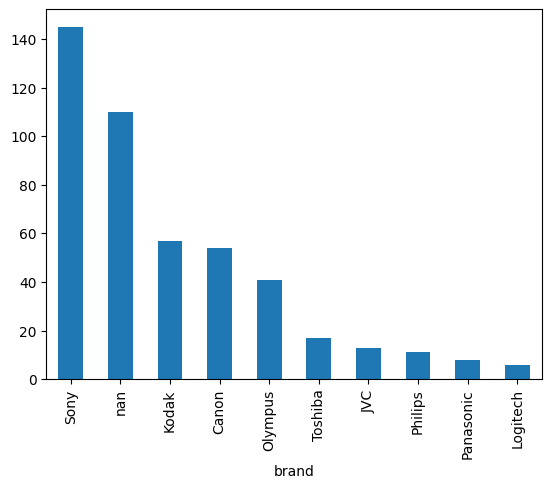

In [35]:
# What product sold the most in 2002
dataset[dataset['year'] == 2002].groupby('brand')['rating'].count().sort_values(ascending=False).head(10).plot(kind='bar')

<Axes: xlabel='brand'>

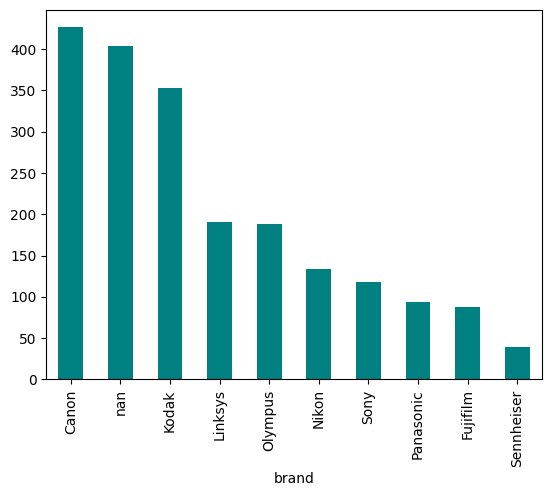

In [44]:
# What product sold the most in 2005
dataset[dataset['year'] == 2005].groupby('brand')['rating'].count().sort_values(ascending=False).head(10).plot(kind='bar',color='Teal')

<Axes: xlabel='brand'>

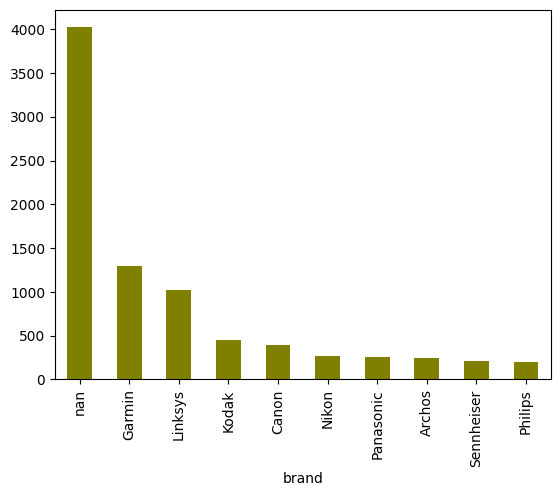

In [48]:
# What products sold the most in 2008
dataset[dataset['year'] == 2008].groupby('brand')['rating'].count().sort_values(ascending=False).head(10).plot(kind='bar',color='Olive')

<Axes: xlabel='month'>

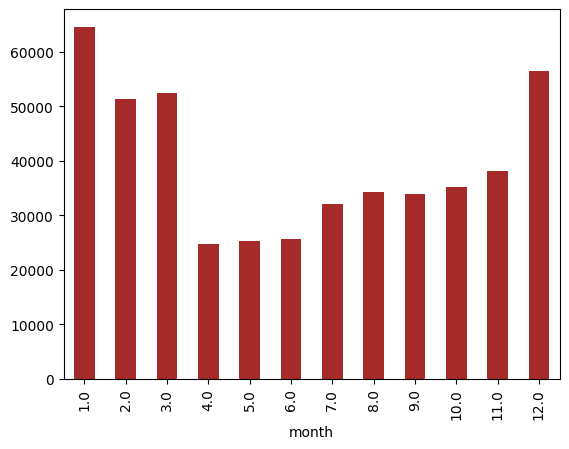

In [52]:
# 2014 had best sales so find out what was the best month for sale
dataset['month'] = pd.DatetimeIndex(dataset['timestamp']).month

dataset.groupby('month')['rating'].count().plot(kind='bar',color='Brown')

<Axes: xlabel='brand'>

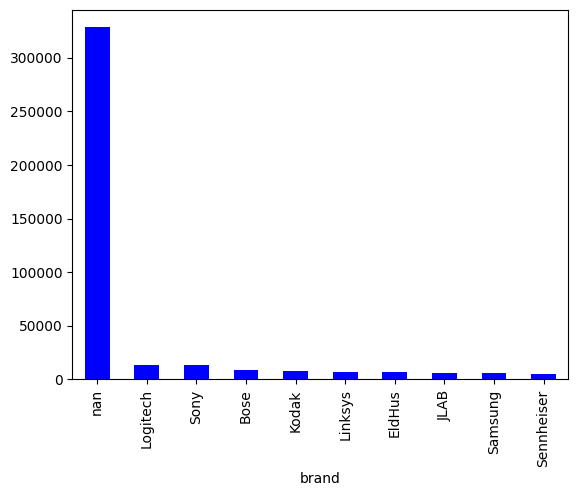

In [54]:
# What product by the Brand name sold most
dataset.groupby('brand')['rating'].count().sort_values(ascending=False).head(10).plot(kind='bar',color='blue')

<Axes: xlabel='category'>

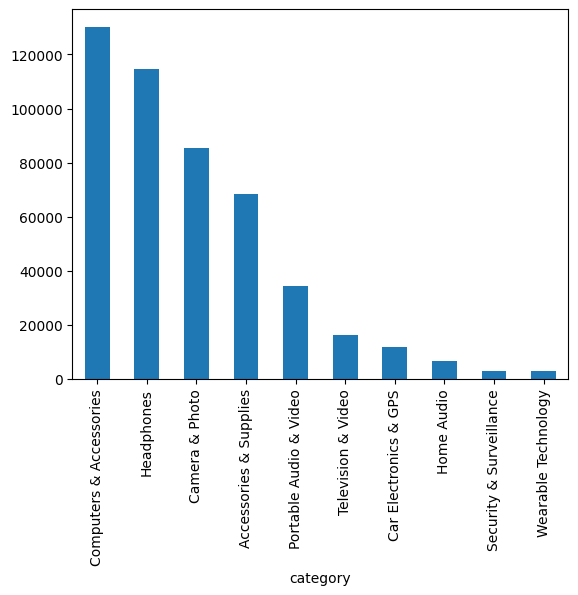

In [55]:
# What product by the category sold most
dataset.groupby('category')['rating'].count().sort_values(ascending=False).head(10).plot(kind='bar')

<Axes: xlabel='brand'>

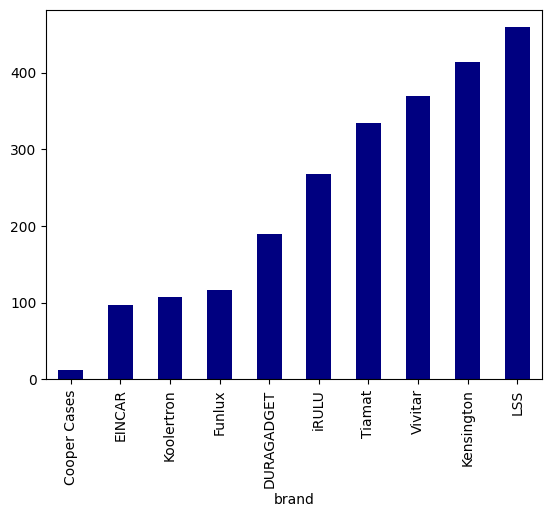

In [57]:
# What product by the brand sold least
dataset.groupby('brand')['rating'].count().sort_values(ascending=True).head(10).plot(kind='bar',color='navy')

<Axes: xlabel='category'>

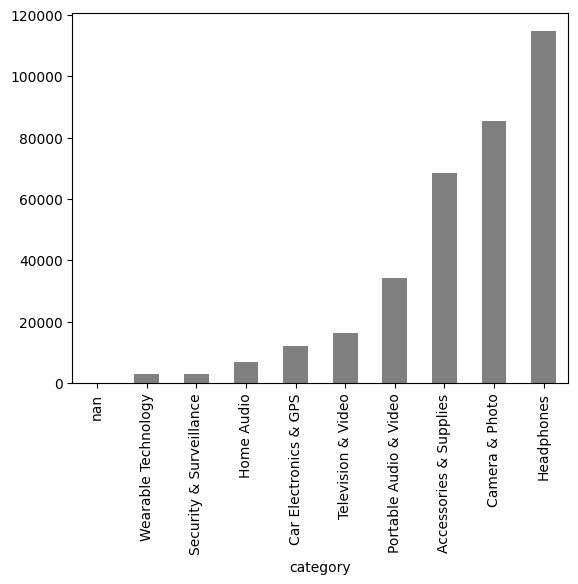

In [59]:
# What product by the category sales least
dataset.groupby('category')['rating'].count().sort_values(ascending=True).head(10).plot(kind='bar',color='gray')

<Axes: ylabel='rating'>

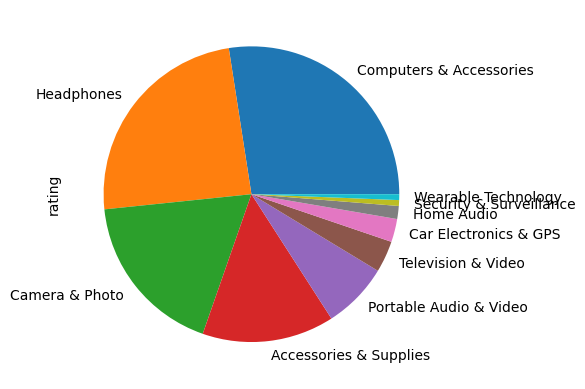

In [60]:
# Category Percentage Sales
dataset.groupby('category')['rating'].count().sort_values(ascending=False).head(10).plot(kind='pie')

<Axes: ylabel='rating'>

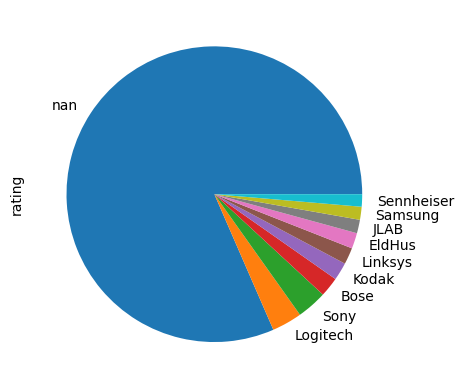

In [62]:
# Brand Percentage Sales
dataset.groupby('brand')['rating'].count().sort_values(ascending=False).head(10).plot(kind='pie')